<a href="https://colab.research.google.com/github/MeghanGH/time-series-with-python/blob/main/Visualizing_time_series_data_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **To work with time series data in pandas,your date columns needs to be of the datetime64 type.**

# import

In [13]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
ch2_co2_levels_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/ch2_co2_levels.csv'
ch2_co2_levels = pd.read_csv(ch2_co2_levels_csv, parse_dates=['datestamp'], index_col='datestamp')
ch2_co2_levels.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


# Line Plots

In [59]:
import pandas as pd
ch2_co2_levels_df = pd.read_csv(ch2_co2_levels_csv)
print(ch2_co2_levels_df.head())

    datestamp    co2
0  1958-03-29  316.1
1  1958-04-05  317.3
2  1958-04-12  317.6
3  1958-04-19  317.5
4  1958-04-26  316.4


## Test whether your data is of the correct type

In [58]:
# Print the data type of each column in discoveries
print(ch2_co2_levels_df.dtypes)

# Convert the date column to a datestamp type
ch2_co2_levels_df['datestamp'] = pd.to_datetime(ch2_co2_levels_df['datestamp'])

# Print the data type of each column in discoveries, again
print(ch2_co2_levels_df.dtypes)

co2    float64
dtype: object


KeyError: ignored

## Plot time series with plt.style

In [47]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [49]:
discoveries_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/ch1_discoveries.csv'
discoveries = pd.read_csv(discoveries_csv)
discoveries.head()

,date,Y
0,01-01-1860,5
1,01-01-1861,3
2,01-01-1862,0
3,01-01-1863,2
4,01-01-1864,0


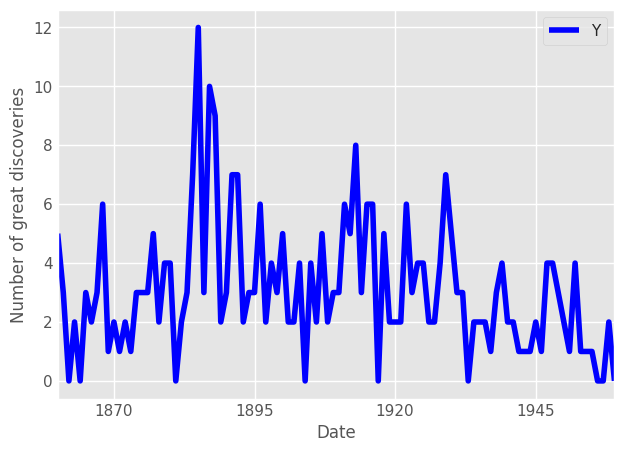

In [50]:
# Set the date column as the index of your DataFrame discoveries
discoveries['date'] = pd.to_datetime(discoveries['date'])
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

## Specify plot styles

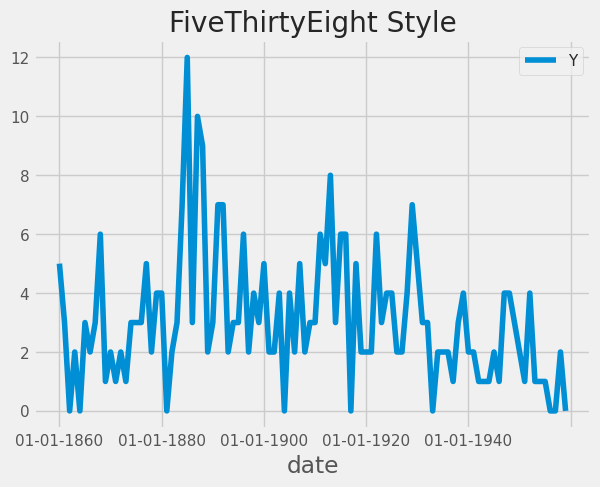

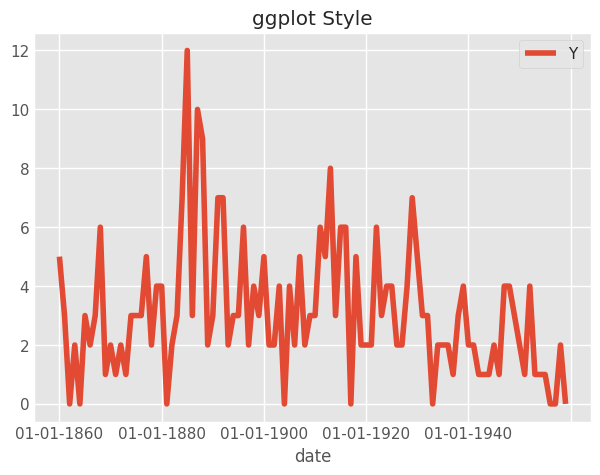

In [38]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

## Display and label plots

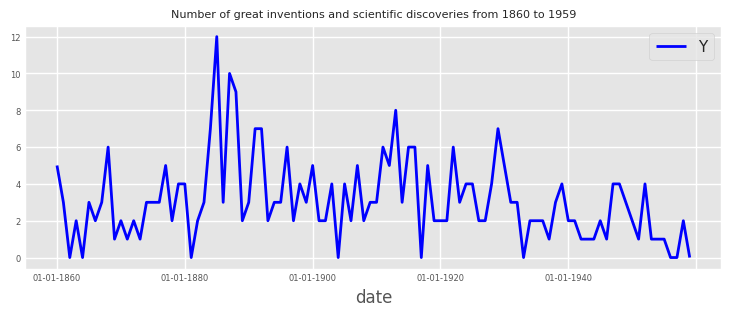

In [31]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

## Subset time series data

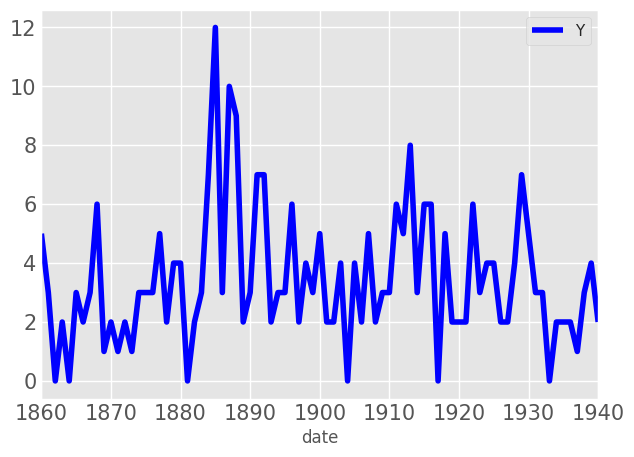

In [52]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1860':'1940']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show()

## Add vertical and horizontal markers

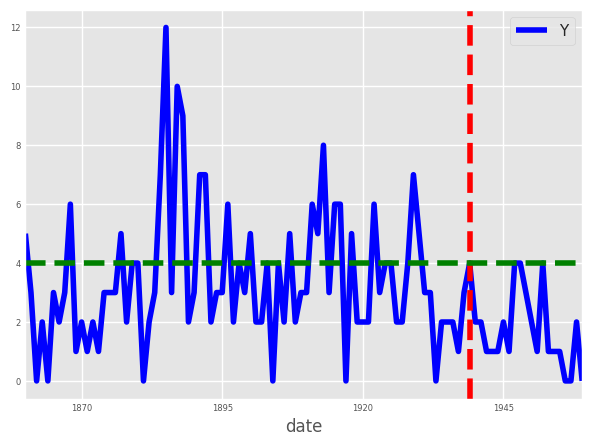

In [53]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(y=4, color='green', linestyle='--')

plt.show()

## Add shaded regions to your plot

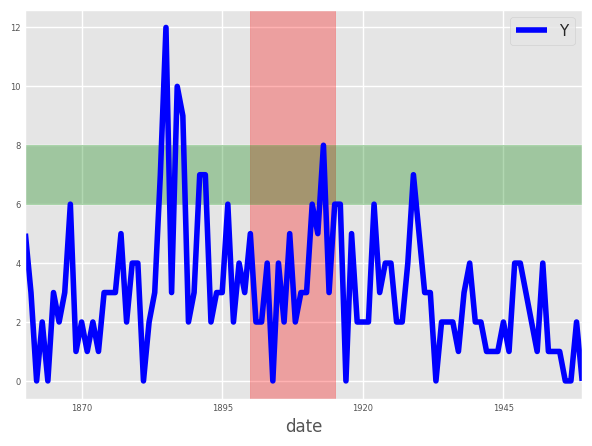

In [54]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()

# Summary Statistics and Diagnostics

## Clean your time series data

In [61]:
co2_levels = ch2_co2_levels

# Set datestamp column as index
# co2_levels = co2_levels.set_index('date')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


In [65]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

#bfill (i.e backfilling) will ensure that missing values are replaced using the next valid observation,
# while ffill (i.e. forward-filling) ensures that missing values are replaced using the last valid observation.

# Print out the number of missing values
print(co2_levels.isna().sum())
print(co2_levels.isnull().sum())

co2    0
dtype: int64
co2    0
dtype: int64


## Display rolling averages
The window parameter should be set according to the granularity of your time series. For example, if your time series contains daily data and you are looking for rolling values over a whole year, you should specify the parameter to window=365.

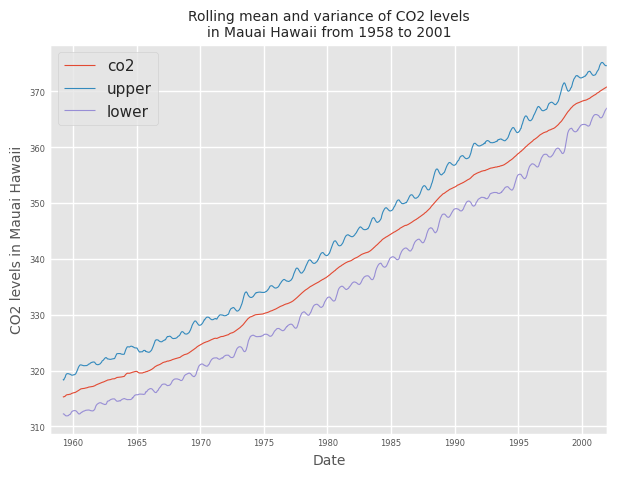

In [66]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

## Display aggregated values

In [67]:
print(co2_levels.head())
print(co2_levels.index.month)

              co2
datestamp        
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
Int64Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
            ...
            10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
           dtype='int64', name='datestamp', length=2284)


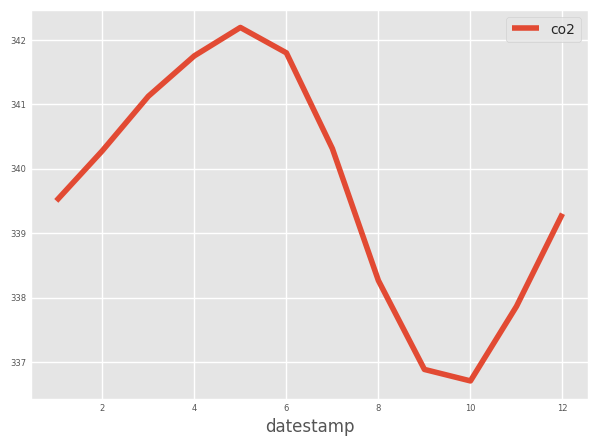

In [68]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

## Summarize the values in your time series data

In [70]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
313.0
373.9


## Boxplots

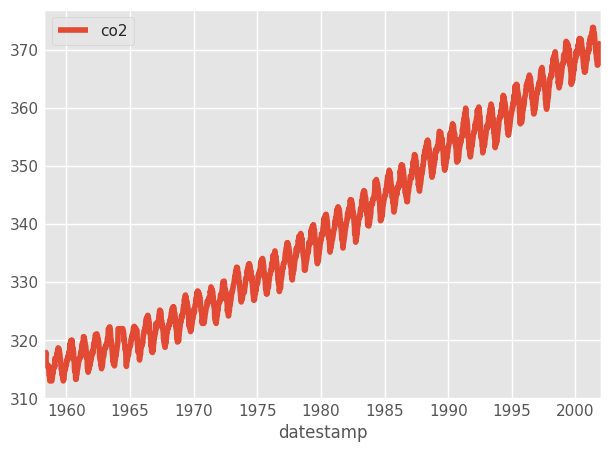

In [75]:
# Generate a boxplot
ax = co2_levels.plot()

# Set the labels and display the plot
# ax.set_xlabel('CO2', fontsize=10)
# ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
# plt.legend(fontsize=10)
plt.show()

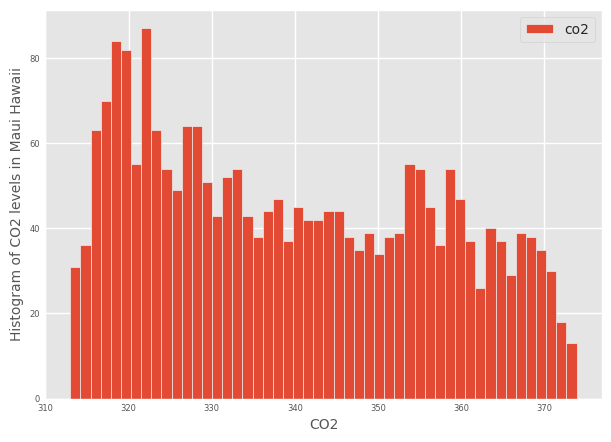

In [71]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

## Histograms

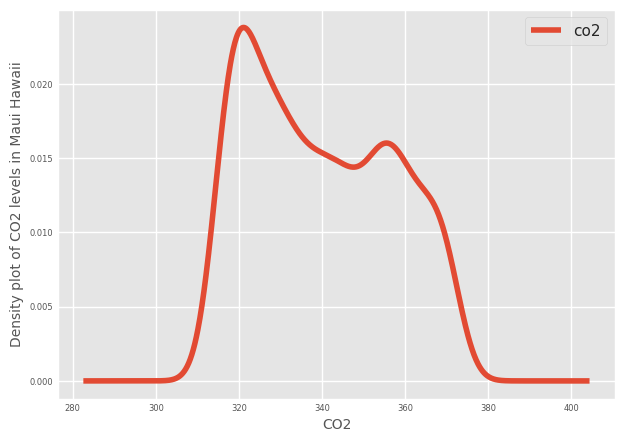

In [72]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()

# Seasonality, Trend and Noise

## Autocorrelation in time series data

In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.

It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The plot_acf() function in the statsmodels library can be used to measure and plot the autocorrelation of a time series.

In [77]:
co2_levels['co2']

datestamp
1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Name: co2, Length: 2284, dtype: float64

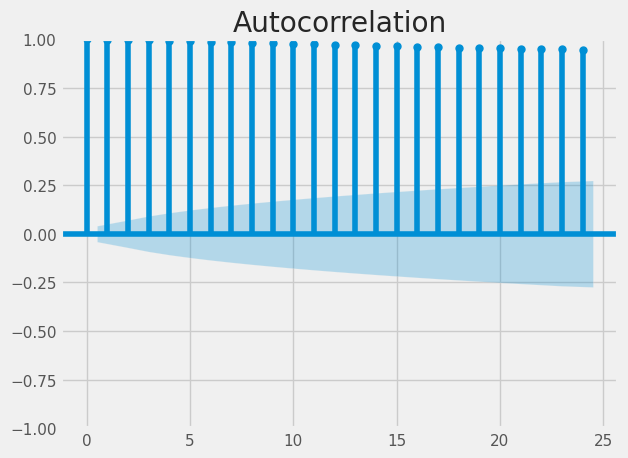

In [76]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

### Interpret autocorrelation plots

If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

In order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.

In the autocorrelation plot below, are consecutive observations highly correlated (i.e superior to 0.5) and statistically significant?

## Partial autocorrelation in time series data